# CSCI 3360 HW 2: Linear Regression

In this assignment, you'll build a *linear regression* model to predict a quantitative variable in your dataset. The model will be trained to best fit the (training) data and evaluated on a test dataset (which wasn't a part of your training set).


## Submission instruction
- Due by 11:59pm on **Feb. 26th, 2018**
- Complete this notebook and name it as "*CSCI3360\_HW2\_{your first name}.ipynb*".
- Do **not** use any other 3rd party libraries unless you are asked to do so.
- Do **not** _hardcode_ any data.
- Feel free to modify function prototype (i.e., you can add additional input parameters based on your needs)
- Feel free to define your own functions if needed.
- Before making a submission, double-check if your code runs and generates correct outputs.

## Part 1. Simple Linear Regression (SLR)
Recall that in SRL our model is 
$$ Y = \beta_0 + \beta_1 X + \epsilon_i\,,$$
where 
- $\beta_0$ is $y$-intercept,
- $\beta_1$ is the slope of our ligression function, and 
- $\epsilon_i \sim N(0, \sigma^2)$ is noise.

Given a dataset $S = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$, we estimate the model parameters $\beta_0, \beta_1$ by minimizing its mean squared error (MSE) on $S$. That is,
$$
(\hat{\beta}_0, \hat{\beta}_1) = \underset{b_0, b_1}{\arg\,\min}\, \text{ MSE}(b_0, b_1; S) := \frac{1}{n}\sum_{i=1}^n (y_i - (b_0 + b_1 x_i))^2\,.
$$
The resulting $\hat{\beta}_0, \hat{\beta}_1$ is called a **least squares** estimator for $\beta_0, \beta_1$.

For the part 1, we will be using the Bike Sharing Demand dataset. Our main goal here is to build a linear regression model to predict the demand for bike rentals of a city. There was a *kaggle* competition on this task, and you can download the dataset from [here](http://www.cs.uga.edu/~jwlee/datasets/day.csv). To better understand the features in our dataset, you can read the description of dataset in [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset#). For your convenience, here's the list of attributes:


- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Q1. Load "day.csv" into a DataFrame. (40 pts)
As you can see from the description above, the dataset contains an index column `instant`. When loading the data, you can tell pandas to use a column as an index by providing `index_col` argument. Use `instant` column as an index for the dataframe. See more details from [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

#### Q1-(a1). List all the attributes available in the dataset and their data types. (2pts)

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# load a csv file and print out the list of attributes
day = pd.read_csv("../Desktop/python/dataset/day.csv", index_col='instant')



df = pd.DataFrame(day)
print df

             dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        2011-01-01       1   0     1        0        6           0   
2        2011-01-02       1   0     1        0        0           0   
3        2011-01-03       1   0     1        0        1           1   
4        2011-01-04       1   0     1        0        2           1   
5        2011-01-05       1   0     1        0        3           1   
6        2011-01-06       1   0     1        0        4           1   
7        2011-01-07       1   0     1        0        5           1   
8        2011-01-08       1   0     1        0        6           0   
9        2011-01-09       1   0     1        0        0           0   
10       2011-01-10       1   0     1        0        1           1   
11       2011-01-11       1   0     1        0        2           1   
12       2011-01-12       1   0     1        0        3           1   
13    

- How many attributes are in the dataset? (your answer)
-  Answer: There are 16 attributes 



You may have noticed that the `dteday` attribute has a data type of _object_, instead of _datetime_.
#### Q1-(a2) Convert the data type of  `dteday` attribute from object to datetime. (2 pts)

In [77]:
# your code goes here

day['dteday'] = pd.to_datetime(day['dteday'])
day.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
dteday        731 non-null datetime64[ns]
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 111.4 KB


#### Q1-(b) We will use `cnt` and `temp` as our *response variable* and *feature*, respectively. To see if they are correlated, draw a scatter plot of `cnt` (Y) versus `temp` (X). What relationship do you see? Are they correlated? Is the correlation strong? (5 pts)

The correlation between cnt and temp is 0.627494009033


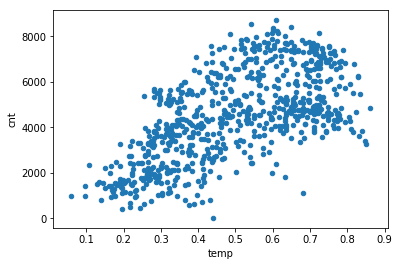

In [79]:
# your code goes here.
"""
# what is cnt?: 
count of total rental bikes including both casual and registered:
# what is temp?:
Normalized temperature in Celsius. 
The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
"""
day.plot(kind="scatter", x="temp",y= "cnt")
# correlation value
correlation = day['temp'].corr(day['cnt'])

print "The correlation between cnt and temp is {}".format(correlation)




Answer:
       "It seems like higher temperature will 
       attract more people to ride the bike.
       The correlation I got is approximately 0.63.
       The correlation is not strong"


#### Q1-(c) Compute the least squares estimators for $\beta_0$ and $\beta_1$ <font color="red">only using numpy and pandas</font> (5pt).
Our model here is 
$$ \text{cnt} = \beta_0 + \beta_1 \times \text{temp}\,. $$

In [231]:
# estimate beta_0 and beta_1 from the data
""" 
    First, we need to know the mathmatical formula to calculate slope
    The slope = (mean(x)*mean(y) - mean(x*y))/(mean(x)^2 - mean(x^2)) 
    The intercept = mean(y) - mean(x)*m
"""
x = day['temp']
y = day['cnt']

slope = (((np.mean(x)*np.mean(y)) - np.mean(x*y))/
        ((np.mean(x)*np.mean(x)) - np.mean(x*x)))    
intercept = (np.mean(y) - np.mean(x)*slope)

b0 = intercept 
b1 = slope  
# your code goes here.


print "intercept b0={0:.5f}".format(b0)
print "slope b1={0:.5f}".format(b1)


intercept b0=1214.64212
slope b1=6640.71000


#### Q1-(d) Draw both data (i.e. scatter plot of y versus x) and the fitted line (2pts).

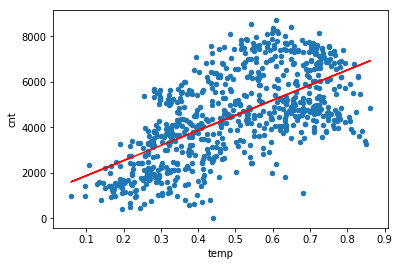

In [233]:
day.plot(kind="scatter", x="temp",y= "cnt")
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, x*slope + intercept, 'r')

# this is the line best fitted in our data





#### Q1-(e) Suppose the tomorrow's (normalized) temperature of the city (from which the data is collected) is 0.8, i.e. $x=0.8$. What is your prediction on the bike rental count for tomorrow? (2 pts)

In [234]:
# print out your predicted value 
cnt = slope * 0.8 + intercept
print "predicted cnt={}".format(cnt)




predicted cnt=6527.21011787


#### Q1-(f) What is the MSE of your model? (2 pts)

In [246]:
# compute the mse
""" 
    MES, mean squar error 
    easiest way to do is to make a function    
"""
temp = day['temp']
cnt = day['cnt']
mse=0
for a in range(len(temp)):
    mse = mse + (cnt[a+1] - (slope * temp[a+1] + intercept))**2
mse = mse / len(temp)
print "mse=", mse




mse= 2272020.25565


#### Q1-(g) Compute the residual for each observation. What is their sum? (2 pts)
In class, I claimed that 
$$ \sum_{i=1}^n e_i = \sum_{i=1}^n (y_i - \hat{y}_i) = 0\,.$$
In words, the sum of residuals becomes 0. Write a program that verifies this.

In [254]:
# your code goes here.
# the maximum value of a = 730. It should be absolutly fine
rsum = 0

for a in range(len(temp)):
    residual = cnt[a+1] - (slope * temp[a+1] + intercept)
    rsum = rsum + residual
        
print "sum of residual ={} ".format(rsum)

# It means the sum of the residuals is very small. Almost equal to zero. But it does not include any specific meaning.




sum of residual =4.8203219194e-11 


#### Q1-(h) Build a linear regression model using the "<font color="red">statsmodels</font>" package. (4 pts)
- What is the slope and intercept? (1 pts)
- What is your predicted value at $x=0.8$? (1 pts)
- Do you think `temp` is a good variable to explain the demand `cnt`? In other words, does our model perform well? Justify your answer. (2 pts)

In [255]:
# your code goes here.
import statsmodels.api as sm
import statsmodels.formula.api as smf
# what is the slope and intercept?
# ols = ordinary least square 
print "(1)method 1"

X = sm.add_constant(temp)
ols = sm.OLS(y,X).fit()
print ols.params

""" Other way of  calculating slope and intercept"""
# I need to create a dataframe
key = {
     "cnt":cnt,
     "temp":temp
}
df = pd.DataFrame(key)
pdt = smf.ols(formula = 'cnt ~ temp', data= df).fit()
print " "
print "method2"
print pdt.params
# what is your predicted value at x=0.8
pdt_value = 0.8 * 6640.709999 + 1214.642119
print "\n"
print "(2)the predicted value is {}".format(pdt_value)



# Do you think temp is a good variable to explain the demand cnt? In other words, does our model perform well? Justify your answer. 


(1)method 1
const    1214.642119
temp     6640.709999
dtype: float64
 
method2
Intercept    1214.642119
temp         6640.709999
dtype: float64


(2)the predicted value is 6527.2101182


#### Q1-(i) Build the same SLR model using <font color="red">scikit-learn</font> package. (6 pts)
- What are the intercept and slope? (2 pts)
- What is your predicted value when `temp`=0.1? (2 pts)
- What is your $R^2$ score? (2 pts)

In [93]:
from sklearn.linear_model import LinearRegression

# your code goes here 

#What are the intercept and slope? (2 pts)
temp = temp.reshape(-1, 1)

lm2 = LinearRegression()
lm2.fit(temp, cnt)

print "The intercept is {}".format(lm2.intercept_)
print "The slope is{}".format(lm2.coef_)

#What is your predicted value when temp=0.1? (2 pts)
print "when temp=0.1, the predicted value={}".format(lm2.predict(0.1))
#What is your  R^2  score? (2 pts)

"""r = correlation of X and Y,  r square, r^2 means the success rate of the model
The higher the value of r square, the better the model"""


print "The r^2 score is {}".format(correlation **2)



The intercept is 1214.64211903
The slope is[ 6640.70999855]
when temp=0.1, the predicted value=[ 1878.71311888]
The r^2 score is 0.393748731373


#### Q1-(j) Draw a residual plot of the above SLR model (5 pts)

Residual Plot


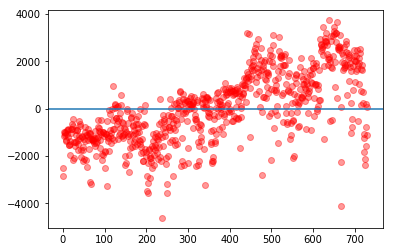

In [95]:
# SLR model: simple linear model
# your code goes here 
print "Residual Plot"
residual_array= []
for a in range(len(temp)):
    if a <=730:
        #print a
        residual = day['cnt'][a+1] - (slope * day['temp'][a+1] + intercept)
        residual_array.append(residual)

residual_array = pd.DataFrame(residual_array)
plt.scatter(range(731),residual_array, alpha=0.4, c = "red" )
plt.axhline(y=0, xmin=0, xmax=1)


#### Q1-(k) Compute the mean of both `cnt` and the predicted `cnt`, i.e., $\overline{Y}$ and $\overline{\hat{Y}}$. How do they compare? (2 pts)

In [261]:
# your code goes here.
# 1st part
mean_cnt =np.mean(day['cnt'])
# 2nd part

total =0
for a in range(len(temp)):
    test = (slope * temp[a+1] + intercept)
    if a <= 731:
        total = total + test

print "mean of cnt={}".format(mean_cnt) # your code
print "mean of predicted bvalue={}".format(total/len(temp)) # your code



mean of cnt=4504.34883721
mean of predicted bvalue=4504.34883721


`seaborn.lmplot()` provides a convenient way to visualize regression models on subsets of a dataset.

#### Q1-(l) Using `lmplot()`, visualize the regression of `cnt` on `temp` by `weathersit`. (3 pts)
- This means that you'll need to group observation by their `weathersit` values, and then fit a line to each group.
- Read carefully the API document of `lmplot()` function.
- See what parameter allows you to define conditional subsets of data.

In [262]:
# your code goes here

## Part 2.EDA

### Q2. Before we apply muliple linear regression, let's do some EDA. (30 pts)

- (a) Does the season affect the bike rental counts? Draw a boxplot of `cnt` by `season` (3 pts)
- (b) Do we have more bike rentals on holidays? Justify your answer with a plot (5 pts)
- (c) Show a bar plot of average number of rentals by the day of week. On average, what day has the largest number of rentals? (5 pts)
- (d) What relationship does the temperature have with humidity? Show both a scatter plot and a correlation coefficient. (3 pts)
- (e) Show a box plot of bike rentals by weather. (3 pts)
- (f) Draw a line plot showing the trend of bike rentals, i.e., x-axis=dteday and y-axis=cnt. (3 pts)
- (g) Compute a correlation matrix and visualize it using <font color="red">seaborn.heatmap()</font> function. (8 pts)   
    + For this question, use the following attributes:<br>
    season, holiday, weathersit, temp, atemp, hum, windspeed, casual, resistered, cnt
    + Show the correlation coefficient in each cell.
    + Make sure that each cell is square-shaped.
    + Set the size of figure to (10, 10).

#### (a) Does the season affect the bike rental counts? Draw a boxplot of cnt by season (3 pts)


Yes, more people involved in riding bike in summer and fall.
 we could make our first assumption that season will somewhat affect people to ride bike


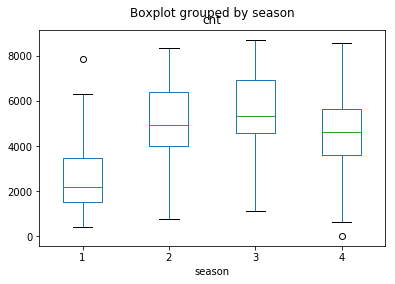

In [263]:
day.boxplot(column ="cnt", by='season', grid=False)

print "Yes, more people involved in riding bike in summer and fall.\n we could make our first assumption that season will somewhat affect people to ride bike"
#suprise me, not outlier??


#### (b) Do we have more bike rentals on holidays? Justify your answer with a plot (5 pts)

In [1]:
day.boxplot(column ="cnt", by='holiday', grid=False)
print "From the boxplot, we could easily see the mean value of no holiday is higher than the holiday.\n So we could make a simple comclusion that holiday will no have more people to ride bike"

NameError: name 'day' is not defined

#### (c) Show a bar plot of average number of rentals by the day of week. On average, what day has the largest number of rentals? (5 pts)

Weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: Number of People, dtype: float64
Weekday 5 has the largest number of rentals = 4690.288462


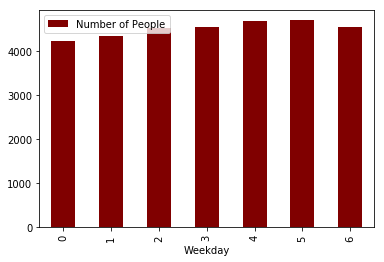

In [265]:

data = {
    "Weekday":day['weekday'],
    "Number of People": day['cnt']   
}

# Then, we will group the value together
df1 = pd.DataFrame(data)
df1.groupby(['Weekday']).groups.keys()
average =df1.groupby(['Weekday'])['Number of People'].mean()
print average 

average = pd.DataFrame(average)
average.plot(kind='bar',grid=False, color="maroon")

print "Weekday 5 has the largest number of rentals = {}".format(4690.288462)


#### (d) What relationship does the temperature have with humidity? Show both a scatter plot and a correlation coefficient. (3 pts)

The corelation between temp and hum is very low = 0.126962939027


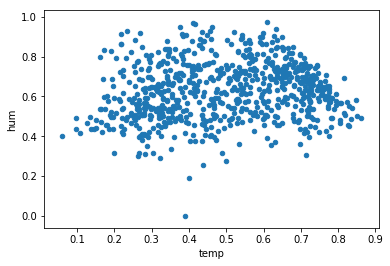

In [266]:
day.plot(kind="scatter", x="temp",y= 'hum')
hum_correlation = day['temp'].corr(day['hum'])

print "The corelation between temp and hum is very low = {}".format(hum_correlation)

#### (e) Show a box plot of bike rentals by weather. (3 pts)

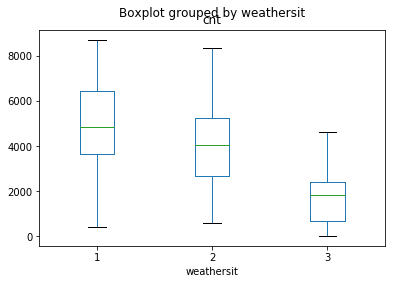

In [267]:
day.boxplot(column ="cnt", by='weathersit', grid=False)

for a in range(len(day['weathersit'])):
    if 4 == day['weathersit'][a+1]:
        print True

# The dataset has not 4 inside.

#### (f) Draw a line plot showing the trend of bike rentals, i.e., x-axis=dteday and y-axis=cnt. (3 pts)

Actually, we could easily see: from 2011-2013
 An increasingly a large amount of people started to join the bike sport game


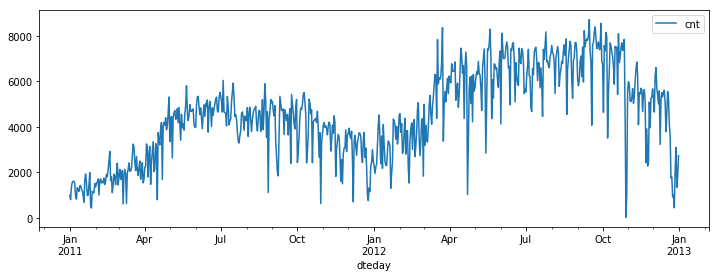

In [268]:
day.plot(kind="line", x= day['dteday'], y=['cnt'],figsize=(12,4))
print "Actually, we could easily see: from 2011-2013\n An increasingly a large amount of people started to join the bike sport game"

#### - (g) Compute a correlation matrix and visualize it using <font color="red">seaborn.heatmap()</font> function. (8 pts)   
    + For this question, use the following attributes:<br>
    season, holiday, weathersit, temp, atemp, hum, windspeed, casual, resistered, cnt
    + Show the correlation coefficient in each cell.
    + Make sure that each cell is square-shaped.
    + Set the size of figure to (10, 10).

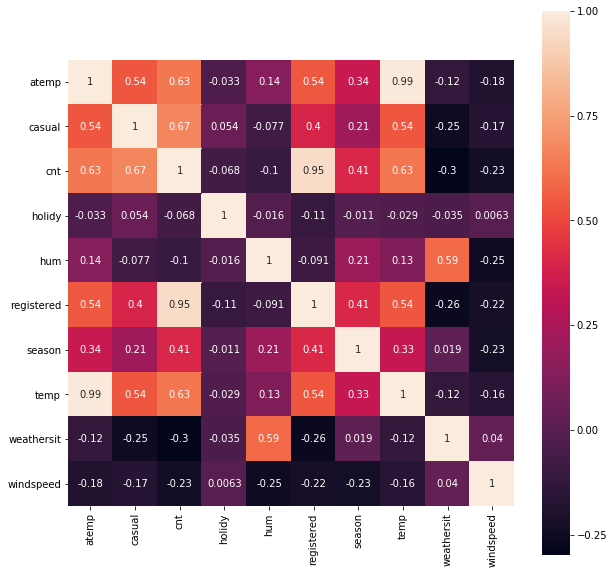

In [269]:
import seaborn as sns

#df = pd.DataFrame(day['registered'],day['cnt'])

m_data  ={
    "season":day['season'],
    "holidy":day['holiday'],
    "weathersit":day['weathersit'],
    "temp":day['temp'],
    "atemp":day['atemp'],
    "hum":day['hum'],
    "windspeed":day['windspeed'],
    "casual":day['casual'],
    "registered":day['registered'],
    "cnt":day['cnt']
    
}
matrix= pd.DataFrame(m_data)
corr = matrix.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,annot=True,square=True)




## Part 3. Multiple Linear Regression (MLR)

In part 1, we built a simple regression model that includes only a sigle feature `temp`. Now we will build a more realistic model by adding more features. First, let's define a list of features we will use in our model.

In [44]:
features = ['season', 'weathersit', 'temp', 'hum', 'windspeed']

### Q3. Build an MLR model. (40 pts)
The model is 
$$ \text{cnt} = \beta_0 + \beta_1\times\text{season} + \beta_2\times\text{weathersit} + \beta_3\times\text{temp} + \beta_4\times\text{hum} + \beta_5\times\text{windspeed}\,.$$

#### Q3-(a1) Build a linear regression model using the features defined above. (5 pts)
- Use the `sklearn.LinearRegression` class
- Print the learned coefficients. (2 pts)
- Compute the MSE of your model. (3 pts)

In [45]:
# your code goes here 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
""" Our target is cnt"""
start = linear_model.LinearRegression()
# First, Preparing the data.
x = day[['season', 'weathersit', 'temp', 'hum', 'windspeed']]
y = day[['cnt']]
start.fit(x,y)
key = {
  "coefficient":start.coef_[0],
  "columns": features 
}
df =pd.DataFrame(key)
df = df[['columns','coefficient']]
print df
print "intercept:{}".format(start.intercept_)


      columns  coefficient
0      season   409.637197
1  weathersit  -460.846289
2        temp  5652.750246
3         hum -2359.905891
4   windspeed -3358.926919
intercept:[ 3446.01180271]


#### Q3-(a2) Repeat the above questions using <font color="red">statsmodel</font>. (5 pts)

In [46]:
# your code goes here.
import statsmodels.api as sm
import statsmodels.formula.api as smf
# what is the slope and intercept?
# ols = ordinary least square 
ols = sm.OLS(y,x).fit()
print ols.params

# Got a very different answer?



season         515.839489
weathersit    -527.174033
temp          6617.762021
hum            566.987018
windspeed     1247.811392
dtype: float64


#### Q3-(b) Draw the residual plot of your model. (5 pts)
- Draw a horizontal line at residual=0.
- Does the plot imply that there's non-linear relationship between features and response? Justify your answer. (2 pts)
The model is 
$$ \text{cnt} = \beta_0 + \beta_1\times\text{season} + \beta_2\times\text{weathersit} + \beta_3\times\text{temp} + \beta_4\times\text{hum} + \beta_5\times\text{windspeed}\,.$$

The linear relationship might still exist


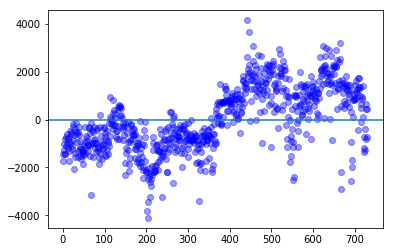

In [47]:
# your code goes here
cnt_pdt = start.predict(x)
r_df= pd.DataFrame(cnt_pdt)

a_df = pd.DataFrame(day['cnt'])
a_df.index = range(731)

rsd = []
#now we need to calculate the residual 
for a in range(len(day['cnt'])):
    left = a_df['cnt'][a] - r_df[0][a]
    rsd.append(left)    

rsd = pd.DataFrame(rsd)

plt.scatter(range(731), rsd, alpha=0.4, c = "blue")

plt.axhline(y=0, xmin=0, xmax=1)

print "The linear relationship might still exist"


A natural question to ask is whether we can improve the accuracy by adding or removing features from the model. Let's consider the following models:

In [54]:
model1 = ['temp', 'season', 'hum']
model2 = ['temp', 'weathersit', 'hum']
model3 = ['atemp', 'season', 'hum', 'windspeed']
model4 = ['atemp', 'season', 'windspeed']
model5 = ['atemp', 'season', 'weathersit', 'hum', 'windspeed']

We will build the models listed in above and evaluate them by computing MSEs. So far, we've been only computing the training error. In other words, we used the same dataset for both training and computing the MSE. To get a better estimate on the error, let's split the dataset into two parts, _training set_ and _test set_. We will build a model using the traning set and then evaluate it on the test set. 
Scikit-learn provides a tool for splitting dataset into train/test sets. You can use `sklearn.model_selection.train_test_split()`.

#### Q3-(c). Complete the implementation of `test_MSE()` function. (5 pts)
- Read the documentation of `train_test_split()`.
- Use 20% of data for testing the model, i.e., the size of test set = 20% * the size of dataset

In [61]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn import metrics

def test_MSE(features_to_use):
    """
    Parameters:
    --------------
    features_to_use: a list of feature names
    
    Returns:
    ---------------
    mse: float, test MSE
    """
    # your code goes here
    x1 = day[features_to_use]
    regressor = LinearRegression()
    x1_train, x1_test, y1_train, y1_test =sklearn.model_selection.train_test_split(x1, day['cnt'],test_size=0.2)
    x1_result = regressor.fit(x1_train, y1_train)
    y_pred = regressor.predict(x1_test)
    df= pd.DataFrame({'actual':y1_test, 'predicted':y_pred})
    mse = metrics.mean_squared_error(y1_test,y_pred)
    return mse

# models to test
models = [model1, model2, model3, model4, model5]

for idx, features_to_use in enumerate(models):
    mse = test_MSE(features_to_use)
    print "MSE of model {0}: {1}".format(idx+1, mse)    

MSE of model 1: 1948200.05736
MSE of model 2: 1877179.37851
MSE of model 3: 1917577.07911
MSE of model 4: 2386262.64705
MSE of model 5: 1684745.86164


Execute the above cell a few times and then you will see the numbers change every time. The reason is that `train_test_split()` randomly splits the dataset. To get a better idea on their performance, let's compute an averaged test error for each model.

[Text(0,0,u'model 1'),
 Text(0,0,u'model 2'),
 Text(0,0,u'model 3'),
 Text(0,0,u'model 4'),
 Text(0,0,u'model 5')]

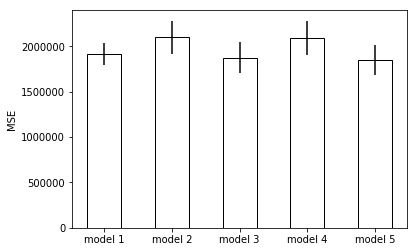

In [62]:
n_repeat = 20
n_models = len(models)  # number of models to compare

model_accuracy = np.zeros((n_models, n_repeat))

for i in range(n_models):
    for j in range(n_repeat):
        model_accuracy[i, j] = test_MSE(models[i])
        
# averaging the MSEs
avg_mse = np.mean(model_accuracy, axis=1)
std_mse = np.std(model_accuracy, axis=1)

# drawing a bar plot with error bars
bar_width = 0.5
ind = np.arange(n_models)
fig, ax = plt.subplots()
ax.bar(ind, avg_mse, bar_width, color='white', ec='k', yerr=std_mse)
ax.set_ylabel('MSE')
ax.set_xticks(ind)
ax.set_xticklabels(["model {}".format(i+1) for i in range(n_models)])


Which model works best?
Answer: overal model3 works the best

#### Q3-(d) Build polynomial regression models of degrees 2, 5, 8, and 10. (10 pts)
So far, we've using a linear regression model without the **basis expansion**, which means our regression function is a linear line. In other words, we've been implicitly assuming that there's a linear relationship between features and response. 
What if our assumption on the linearity of relationship between features and response is wrong? Now we will use higher-order polynomial regression models.

- Read the documentation of `sklean.preprocessing.PolynomialFeatures`
- Use the features in model 5.
- Print $R^2$ scores for each model.


In [69]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
""" Polynomial regression models could help us to find a more precise model for us to use"""
# your code goes here.

# degree=2
x5 = day[model5]
x5_train, x5_test, y5_train, y5_test =sklearn.model_selection.train_test_split(x5, day['cnt'],test_size=0.2)
poly2 = PolynomialFeatures(degree=2)
x_train_poly = poly2.fit_transform(x5_train)
x_test_poly = poly2.fit_transform(x5_test)
reg = LinearRegression()
result = reg.fit(x_train_poly, y5_train)
y_pred = reg.predict(x_test_poly)
r_score = r2_score(y5_test, y_pred)
print r_score


#degree=5
poly5 = PolynomialFeatures(degree=5)
x_train_poly = poly5.fit_transform(x5_train)
x_test_poly = poly5.fit_transform(x5_test)
reg = LinearRegression()
result = reg.fit(x_train_poly, y5_train)
y_pred = reg.predict(x_test_poly)
r_score = r2_score(y5_test, y_pred)
print r_score

#degree=8
poly8 = PolynomialFeatures(degree=8)
x_train_poly = poly8.fit_transform(x5_train)
x_test_poly = poly8.fit_transform(x5_test)
reg = LinearRegression()
result = reg.fit(x_train_poly, y5_train)
y_pred = reg.predict(x_test_poly)
r_score = r2_score(y5_test, y_pred)
print r_score

#degree=10
poly10 = PolynomialFeatures(degree=5)
x_train_poly = poly10.fit_transform(x5_train)
x_test_poly = poly10.fit_transform(x5_test)
reg = LinearRegression()
result = reg.fit(x_train_poly, y5_train)
y_pred = reg.predict(x_test_poly)
r_score = r2_score(y5_test, y_pred)
print r_score


0.571979652813
-1.86530452614
-1.57181813454e+14
-1.86530452614


Do you think higher order polynomials are better than a linear line?

**Digression**: you can visualize the polynomical regression using the Seaborn's `regplot()` function. Check the documentation from [here](https://seaborn.pydata.org/generated/seaborn.regplot.html).

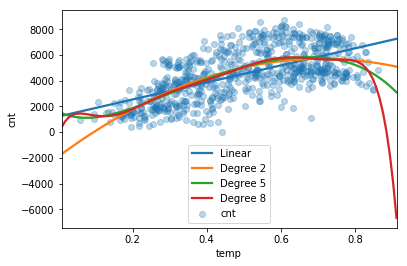

In [107]:
# here I assume the variable 'df' is a DataFrame object that contains your data
df = pd.DataFrame(day)
# draw the data
plt.scatter(df.temp, df.cnt, marker='o', alpha=0.3)

# linear regression
sns.regplot(df.temp, df.cnt, ci=None, label='Linear', scatter=False)

# polynomial of degree 2
sns.regplot(df.temp, df.cnt, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(df.temp, df.cnt, ci=None, label='Degree 5', order=5, scatter=False)
sns.regplot(df.temp, df.cnt, ci=None, label='Degree 8', order=8, scatter=False)
plt.legend()

#### Q3-(e1) Draw the residual plots for your polynomial regresion models.  (8 pts)
- Plot the residuals against the fitted values, i.e. x-axis=fitted value while y-axis=residual
- You can use `sns.regplot()` to visualize the residuals
- Use the given settings for lines and scatter plots.
- Set `lowess=True`, so that it uses `statsmodel`'s nonparametric regressino model.


In [53]:
# use this settings
line_kws={'color':'r', 'lw':1}
scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5}

# your code goes here.



# draw a residual plot for each polynomial regression model.



#### Q3-(e2) How does the residual plot change as you increase the order of polynomials? (2 pts)

## Part 4. Variance Inflation Factor (VIF)

When two variables in our dataset are highly *correlated* we say there's a **collinearity**. When there are more than two highly correlated variables, it is called **multicollinearity**. When we have collinearity (or multicollinearity), it's problematic since they increase the variance of our estimates (i.e., they reduce the accuracy).

A simple ways to detect collinearity is to compute the correlation matrix. We already have done this in Q2-(g).

### Q4. Answer the following questions. (15 pts)

#### Q4-(a). From the figure you draw in Q2-(g), which pair of attributes has the strongest correlation? (2 pts)

However, with the correlation matrix, we can only detect the correlation between two variables. In other words, multicollinearity cannot be detected with this method. A way to deal with multicollinearity is to compute the *<font color="red">variance inflation factor</font>* (VIF). The VIF for each variable $X_j$ is computed as follows:
$$ \mathrm{VIF}(\hat{\beta}_j) = \frac{1}{1 - R^2_{X_j~|~X_{-j}}} \,,$$
where $R^2_{X_j~|~X_{-j}}$ is the $R^2$ score of regressing $X_j$ onto all other attributes.



### Q4-(a):
- temp and atemp has the strongest correlation
- registered and cnt has the strongest correlation 



#### Q4-(b) Perform a regression of `cnt` on `temp`, `atemp`, `weathersit`. (2 pts)
- Print $R^2$-score.

In [226]:
features_to_use = ['temp', 'atemp', 'weathersit']

# your code goes here
# First, we need to find the predic value
   
x5=day[features_to_use]
x5_train, x5_test, y5_train, y5_test =sklearn.model_selection.train_test_split(x5, day['cnt'],test_size=0.2)
reg = LinearRegression()
result = reg.fit(x5_train, y5_train)
y_pred = reg.predict(x5_test)
r_score = r2_score(y5_test, y_pred)
print "Here is the R square score= {}".format(r_score)



Here is the R square score= 0.351717234504


#### Q4-(c) For each feature $X_j$ in `features_to_use`, perform a regression of $X_j$ on all other variables and compute the $R^2$-score.  (6 pts)
In other words,
- Regression of Y=`temp` on X=(`atemp`, `weathersit`)
- Regression of Y=`atemp` on X=(`temp`, `weathersit`)
- Regression of Y=`weathersit` on X=(`temp`, `atemp`)

In [227]:
# Use this template
x5=day[features_to_use]
x = []
df = pd.DataFrame(x5)
for i in range(len(features_to_use)): 
    # perform a regression of X_i on the rest of variables
    # compute VIF for \beta_i
    major = df[features_to_use[i]]
    del df[features_to_use[i]]
    rest = df 
    x5_train, x5_test, y5_train, y5_test =sklearn.model_selection.train_test_split(rest, major,test_size=0.2)
    reg = LinearRegression()
    result = reg.fit(x5_train, y5_train)
    y_pred = reg.predict(x5_test)
    r_score = r2_score(y5_test, y_pred)
    vif = 1/(1 - r_score)
    print "VIF for {0} = {1}".format(features_to_use[i], vif)
    df = pd.DataFrame(day[features_to_use])
    x.append(vif)


# The VIF will change ! If you have a large R-score, you will have a larger VIF.
# Also, it means our model is not precisely accurate.

VIF for temp = 123.394315928
VIF for atemp = 164.693248659
VIF for weathersit = 0.999028195855


Normally, a VIF value greater than 5 or 10 is a good indication of multicollinearity. You should see VIF values larger than this threshold, as in our example the temperature `temp` and feels like temperature `atemp` are highly correlated. When there is a collinearity, one thing you can simply do is to drop a variable with a high VIF value.

#### Q4-(d) Drop the variable with the highest VIF factor from `features_to_use` and perform a regression of `cnt` on the rest two other variables. (5 pts)
- Print $R^2$-score
- Compare this value with that in Q4-(b)
- What does this mean?

In [228]:
"""      
     After all the calculation, we drop the highest one. 
     Then, we have a dataframe with two columns remained.
     So, we need a if-else function to delete the highest value( comparison)
     Finally, we will see the changes we made. 
     I guess, our model should be more accurate
"""
# Creating a function to pick up the highest number in the array

def get_highest(x):
    m = x[0]
    index = 0
    for i in range(len(x)-1):
        if m - x[i+1]>=0:
            m
        elif m - x[i+1] <0:
            m=x[i+1] 
    return m   

# we need frop the highest score from the result of the Q4(c)
highest = get_highest(x)
# we know the number, but we don't know which index is that.
index =0
for i in range(len(x)):
    if x[i] == highest:
        index =i
x5=day[features_to_use]
df = pd.DataFrame(x5)
del df[features_to_use[index]]
# right now, we could simply calculate the r score
x5_train, x5_test, y5_train, y5_test =sklearn.model_selection.train_test_split(df, day['cnt'],test_size=0.2)
reg = LinearRegression()
result = reg.fit(x5_train, y5_train)
y_pred = reg.predict(x5_test)
score = r2_score(y5_test, y_pred)

print "R square score = {}".format(score)
                                                                                


R square score = 0.369966633895
